**Libraries**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
import joblib
# Download the WordNet resource
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Here, I am merging 2 datasets because; Before spliting them,I need to preprocess all the data. Also this process is essential to evaluate the model precisely.

**Load Data**

In [ ]:
df_train = pd.read_csv('/content/twitter_training.csv')
df_val = pd.read_csv('/content/twitter_validation.csv')
df = pd.concat([df_train, df_val], ignore_index=False)
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


**Data Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

**Data** **Cleaning**

We can clearly see that in the data set we have unnecessary coloums that will not serve the text classificatiton. I am going to drop them in order to have clean dataset

In [ ]:
# Remove unnecessary columns
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant',
                   'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
df = df.drop(columns_to_drop, axis=1)

# Rename columns
df = df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Branch"})
df.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


Before we continue we need to check the completeness of the dataset

In [ ]:
print(df.isnull().sum())

Branch        999
Sentiment     999
Tweet        1685
dtype: int64


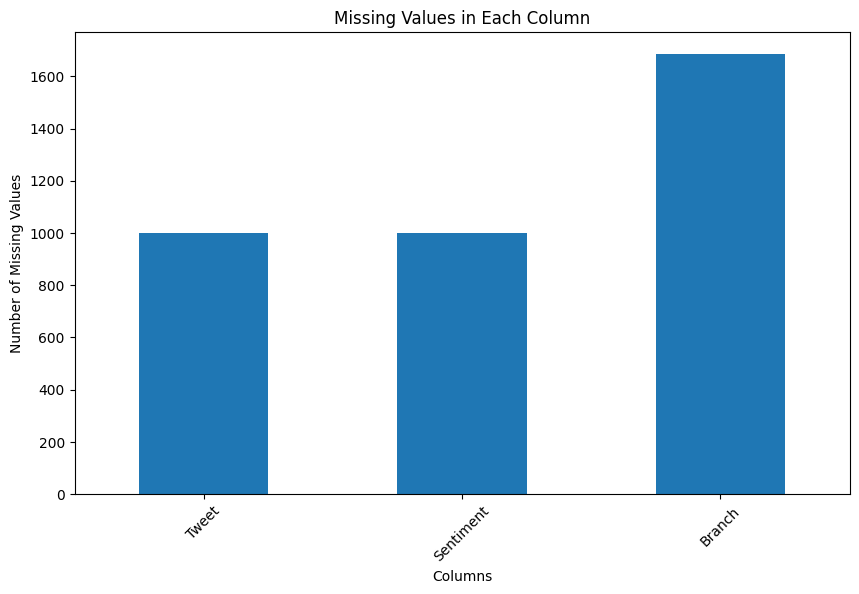

Tweet         999
Sentiment     999
Branch       1685
dtype: int64

In [ ]:
# Rename the columns for better clarity
df.columns = ['Tweet', 'Sentiment', 'Branch']

# Check for missing values
missing_values = df.isnull().sum()

# Visualize the missing values using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

# Display the missing values in a table
missing_values

In [ ]:
# remove missing values
df.dropna(inplace=True)
# check missing values
df.isnull().sum()

Tweet        0
Sentiment    0
Branch       0
dtype: int64

Also we will check the duplications since it will effect our probability calculations. Because even though the sentence is the same the count function will count same words twice, which will effect the processes that i am going to apply later on.

In [ ]:
df.duplicated().sum()

3038

In [ ]:
# remove duplicate values
remove_duplicates = df.drop_duplicates()
df = remove_duplicates
# check duplicate values
df.duplicated().sum()

0

**Visualization of the DATA**

Sentiment Distribution

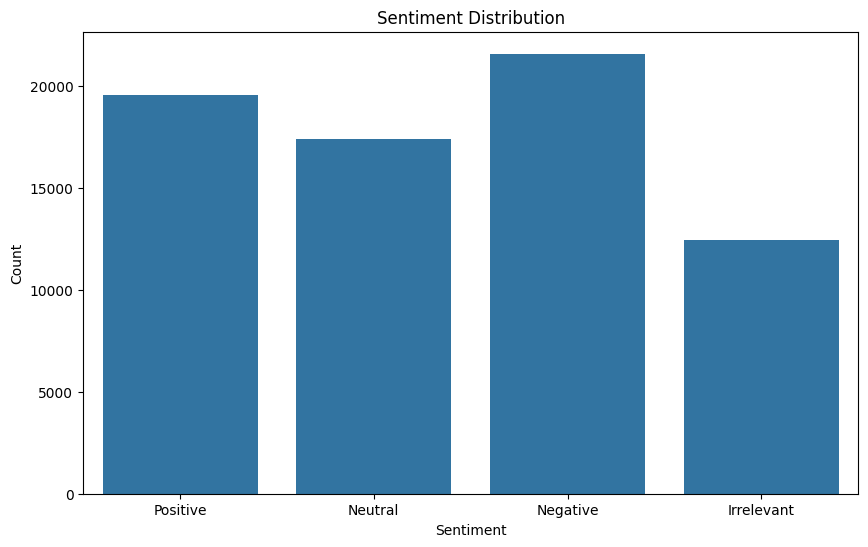

In [ ]:
import seaborn as sns

# Sentiment dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



Distribution of Comment Lengths for each sentiment

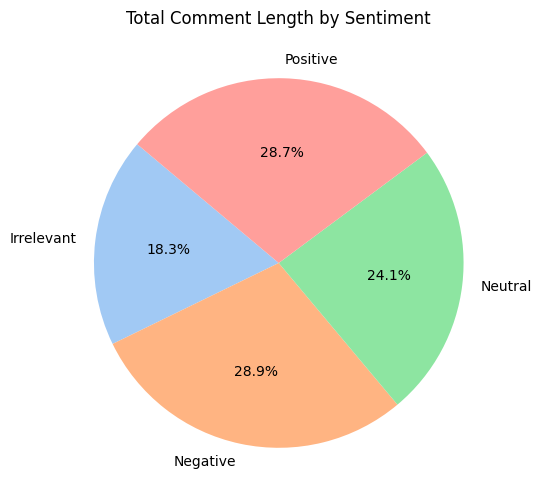

In [ ]:
exception_count = 0
try:
  # Yorum uzunluklarını hesapla
  df['Comment_Length'] = df['Tweet'].apply(lambda x: len(str(x)))
  #max_comment_length = df['Comment_Length'].max()
  # grapinh each sentiment by their lenght of comment
  comment_length_by_sentiment = df.groupby('Sentiment')['Comment_Length'].sum()
  #plt.xlim(0, max_comment_length if max_comment_length < 450 else 450)
  plt.figure(figsize=(10, 6))
  comment_length_by_sentiment.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
  plt.title('Total Comment Length by Sentiment')
  plt.ylabel('')  # Y eksenini kaldır
  plt.show()

except ValueError:
  exception_count += 1
   # Store the value that caused the exception
  print(f'the number of exception occured {exception_count}')

NOTE: I dont know why but while trying to create cross-tabulation table I noticed that the dataset coloumns name has changed.

In [ ]:
df.head(5)

,Tweet,Sentiment,Branch,Comment_Length
0,Borderlands,Positive,I am coming to the borders and I will kill you...,11
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,11
2,Borderlands,Positive,im coming on borderlands and i will murder you...,11
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,11
4,Borderlands,Positive,im getting into borderlands and i can murder y...,11


In [ ]:
columns_to_drop = ['Comment_Length']
df = df.drop(columns_to_drop, axis=1)
df.head(5)

,Tweet,Sentiment,Branch
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.rename(columns={'Tweet': 'Branch', 'Branch': 'Tweet'}, inplace=True)


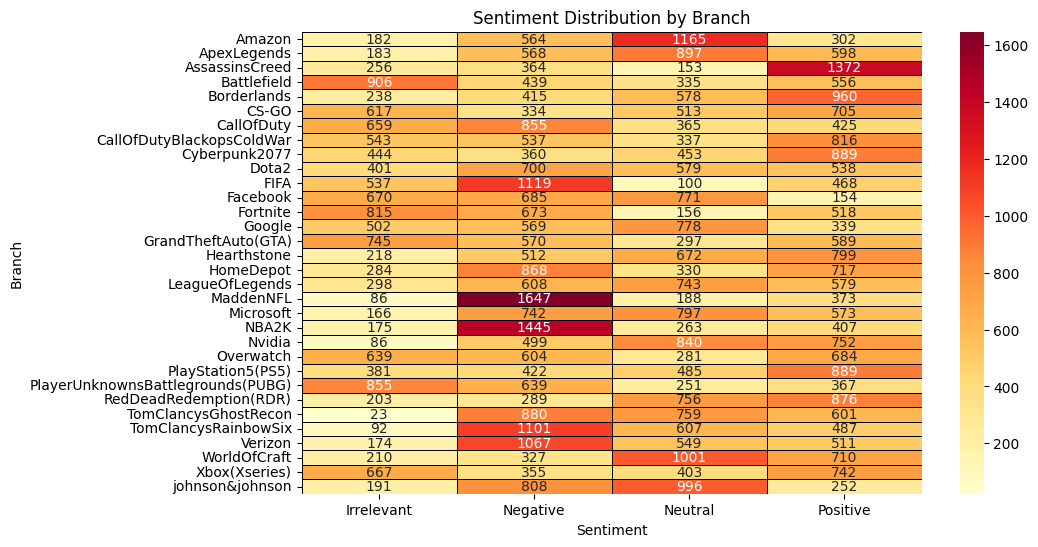

In [ ]:
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['Branch'], columns=df['Sentiment'])
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

In [ ]:
# Display minimum and maximum values for each sentiment for each branch
for sentiment in count_table.columns:
    min_branch = count_table[sentiment].idxmin()
    max_branch = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Branch '{min_branch}'")
    print(f"  Maximum value '{max_val}' at Branch '{max_branch}'\n")

Sentiment 'Irrelevant':
  Minimum value '23' at Branch 'TomClancysGhostRecon'
  Maximum value '906' at Branch 'Battlefield'

Sentiment 'Negative':
  Minimum value '289' at Branch 'RedDeadRedemption(RDR)'
  Maximum value '1647' at Branch 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '100' at Branch 'FIFA'
  Maximum value '1165' at Branch 'Amazon'

Sentiment 'Positive':
  Minimum value '154' at Branch 'Facebook'
  Maximum value '1372' at Branch 'AssassinsCreed'



Above we can get uselfull information about the branches min-max values of our dataset.

I am going to count all the words and create a **Cloud Plot** of words in order to see which words are repeated most.

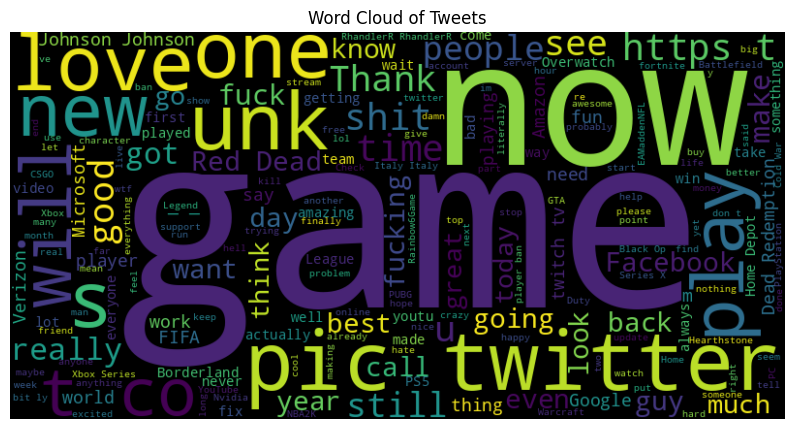

In [ ]:
# Concatenate all tweets into a single string
tweets_all_in_text = ' '.join(df['Tweet'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(tweets_all_in_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

We understand there are mostly comments about the games. I can justify this by creating the same graph type but with the branches.

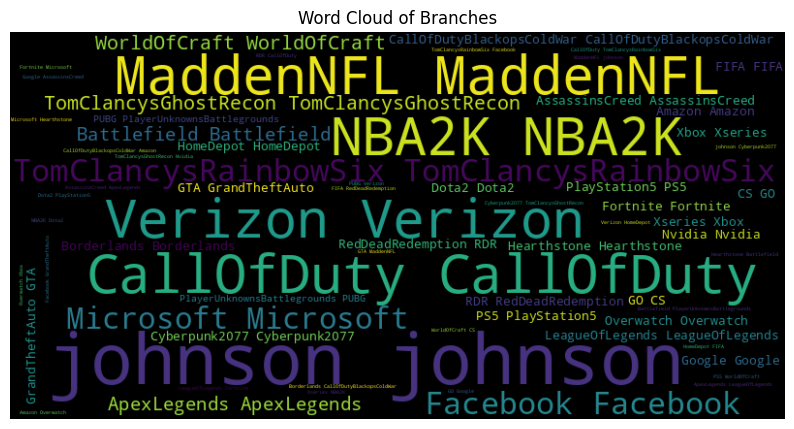

In [ ]:
branches_in_text= '  '.join(df['Branch'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(branches_in_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Branches')
plt.axis('off')
plt.show()

**PREPROCESSING**

1. Case Folding
2. Removal
3. Tokenization


From the first look I can see that there are **uncessary numerical values and some emojies** to remove. Also I need to **normalize** all the values by *lowercasing* and *removing Non-Strings* . Furthermore, **Lemmalization** is also could improve the models performance Then I am going to make a further check to see dumb information that will not contribute the embedding or ML process.

**Remove non-String** Values because they dont have syntactically a value


In [ ]:
df= df.dropna(subset = ['Tweet'])
df['Tweet']= df['Tweet'].astype(str)

**Lowercase**

In [ ]:
# As a most used normalization criter we are lowercasing all corpus
df['Tweet']= df['Tweet'].str.lower()
#Checking
df['Tweet'].str.contains(r'[A-Z]', regex=True)


0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Name: Tweet, Length: 70957, dtype: bool

**Removing  URLs-HTMLS**

In [ ]:
print('\033[1m' + 'Text before removing URLs -HTMLS' +'\033[0;0m')
df['Tweet'].str.contains(r'https?://\S+|www\.\S', regex=True)



Text before removing URLs -HTMLS


0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Name: Tweet, Length: 70957, dtype: bool

In [ ]:
df['Tweet'].str.contains(r'<.*?>', regex=True)

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Name: Tweet, Length: 70957, dtype: bool

In [ ]:
df['Tweet'].str.contains(r'http\S+|www\S+', regex=True)

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Name: Tweet, Length: 70957, dtype: bool

There are **NO** 'HTML' or 'URL' or 'LINK' strings so no need the apply

Removing Numerig Digits
They are generally irrelevant or doesnt contribute the classification task

In [ ]:
df['Tweet'].str.contains(r'\d+', regex=True)

0        False
1        False
2        False
3         True
4        False
         ...  
74676     True
74677     True
74678     True
74679     True
74680     True
Name: Tweet, Length: 70957, dtype: bool

In [ ]:
#checking the sentence that contains numrical value for observational motivation
df['Tweet'][74680]

'just like the windows partition of my mac is like 6 years behind on its drivers so you have no idea how i didn’t notice'

In [ ]:
df['Tweet']= df['Tweet'].str.replace(r'\d+','', regex=True)
df['Tweet'].str.contains(r'\d+', regex=True)

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Name: Tweet, Length: 70957, dtype: bool

In [ ]:
#checking the sentence that contains numerical value for observational motivation
df['Tweet'][74680]

'just like the windows partition of my mac is like  years behind on its drivers so you have no idea how i didn’t notice'

Removing **Punctuation**

In [ ]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#creating a dictionary frun the list contains all the punctuations for further usage
dict_punc_remove= dict.fromkeys(punc,' ')

This Part Directly Taken By course material Lab1: Preprocessing (remove Punctuations)

In [ ]:
PUNCTUATIONS = string.punctuation.replace('#','')
def remove_punctuation(text):
    trans = str.maketrans(dict.fromkeys(PUNCTUATIONS, ' '))

    return text.translate(trans)
df['Tweet'] = df['Tweet'].apply(lambda x: remove_punctuation(x))
df['Tweet'].tail(10)

74671    let no elite go unnoticed    nvidia highlights...
74672    let no elim go unnoticed     nvidia highlights...
74673    let a no information elim that go unnoticed   ...
74674     unk  my elim be no     nvidia highlights pict...
74675    just realized the windows partition of my mac ...
74676    just realized that the windows partition of my...
74677    just realized that my mac window partition is ...
74678    just realized the windows partition of my mac ...
74679    just realized between the windows partition of...
74680    just like the windows partition of my mac is l...
Name: Tweet, dtype: object

**STOPWORD** Removal

Note: It would be better to apply stopword removal after tokenization since it will be already splitted

In [ ]:
STOPWORDS = stopwords.words('english')
STOPWORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#splitting the word if it is not in the stopwords list and rejoining them again.
#therefore we will just have the words that are not stopwords

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])
df['Tweet']= df['Tweet'].apply(lambda x:remove_stopwords(x))
df['Tweet'][74680]


'like windows partition mac like years behind drivers idea didn’t notice'

Emoji Removal (taken from lab 1)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df['Tweet']= df['Tweet'].apply(lambda x: remove_emoji(x))

**Tokenization**

In [ ]:
def tokenize_text(text):
    """Split the text into individual words or tokens."""
    return word_tokenize(text)

df['Tweet']= df['Tweet'].apply(lambda x: tokenize_text(x))
df['Tweet'][74680]



['like',
 'windows',
 'partition',
 'mac',
 'like',
 'years',
 'behind',
 'drivers',
 'idea',
 'didn',
 '’',
 't',
 'notice']

Create **TEST** and **TRAIN** pieces of the dataset

In [ ]:
# df_processed contains preprocessed text data
# Convert list of words into a single string for each entry in 'Tweet' column
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y)
X = df['Tweet']  # Features
y = df['Sentiment']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


For the classificiation I will use


1.   **Random Forest Classifier**

2.  **Linear Regression**


And then I will compare Their Performance



**Random Forest Classifier**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9157976324689966


**Confusion Matrix**

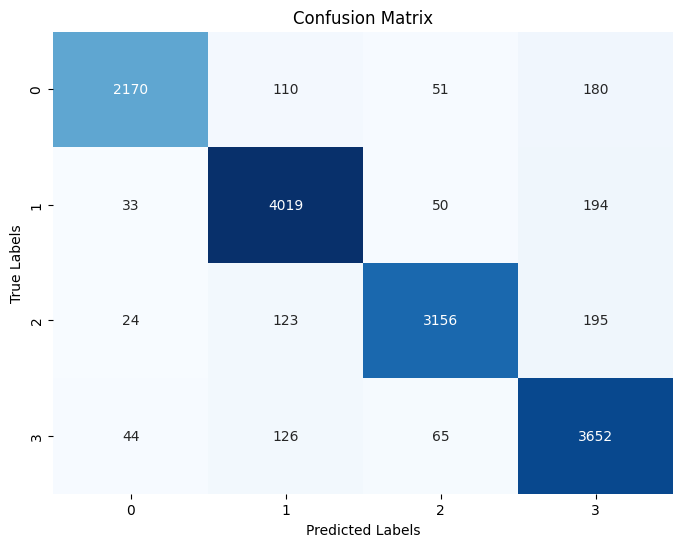

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.86      0.91      2511
    Negative       0.92      0.94      0.93      4296
     Neutral       0.95      0.90      0.93      3498
    Positive       0.87      0.94      0.90      3887

    accuracy                           0.92     14192
   macro avg       0.92      0.91      0.92     14192
weighted avg       0.92      0.92      0.92     14192



In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

Tesing the actual tweets and the predicted ones

In [ ]:
# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: women please work stores like circuit home hardware get bored condescending men thinking don ’ t know another screw
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: zai absolute beast redd fe
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: hard fought indeed …
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: rhandlerr i ’ m superstar solo wins criminal deserved pic twitter com hilloxffi
Actual Label: Irrelevant
Predicted Label: Irrelevant
-----------------------
Tweet: ea eamaddennfl recent announcement ea locked another long term contract nfl remarkably disrespectful fans madden years allow competition madden longer quality
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: first played apex got wave happiness brings back
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: speed better ever

Saving The Model

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'rf_modelforsentiment.pkl')

['rf_modelforsentiment.pkl']

Trying with the random tweets

In [ ]:
# Load the saved model
Tweet_Sentiment_Ai = joblib.load('rf_modelforsentiment.pkl')

# Define a mapping between sentiment labels and emojis
sentiment_emojis = {
    'Positive': '😄',
    'Negative': '😞',
    'Neutral': '😐',
    'Irrelevant': '🤷‍♂️'
}

# Example tweets
example_tweets = [
    "I've just finished playing GTA 5 it was trully a masterpiece .",
    "I have played CS:GO for many years and I recommend it to every human being",
    "The cuphead was trully a hard game. But it doesn't mean that it is a bad game. Cuphead is a good game. the beauty of the game comes from its hardness. So I like playing hard games ",
    " I should cath up with GTA 5 "
]

# Transform example tweets into TF-IDF features
example_tweets_tfidf = vectorizer.transform(example_tweets)

# Predict sentiment for example tweets
predictions = Tweet_Sentiment_Ai.predict(example_tweets_tfidf)

# Print the predicted sentiment and corresponding emoji for each example tweet
for tweet, prediction in zip(example_tweets, predictions):
    sentiment = prediction
    emoji = sentiment_emojis[sentiment]  # Get the emoji directly from the mapping without a default value
    print("Tweet:", tweet)
    print("Sentiment:", sentiment)
    print("Emoji:", emoji)
    print()

Tweet: I've just finished playing GTA 5 it was trully a masterpiece .
Sentiment: Positive
Emoji: 😄

Tweet: I have played CS:GO for many years and I recommend it to every human being
Sentiment: Positive
Emoji: 😄

Tweet: The cuphead was trully a hard game. But it doesn't mean that it is a bad game. Cuphead is a good game. the beauty of the game comes from its hardness. So I like playing hard games 
Sentiment: Negative
Emoji: 😞

Tweet:  I should cath up with GTA 5 
Sentiment: Irrelevant
Emoji: 🤷‍♂️



**Linear Regression Model**

In [ ]:
#first we need to define the vocabulary using the training data only!
vocab = set()
for sent in X_train:
    for word in sent.split(" "):
        vocab.add(word.strip())

#print(vocab)

print(len(vocab))

28360


In [ ]:
from sklearn.linear_model import LogisticRegression #Prediction Model

documents_train = list(X_train)
documents_test = list(X_test)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#tfidf for the training data
vectorizer = CountVectorizer(lowercase=True, vocabulary=vocab)
X_count_train = vectorizer.fit_transform(documents_train)
transformer = TfidfTransformer()
X_tfidf_train = transformer.fit_transform(X_count_train)

#tfidf for the testing data
vectorizer = CountVectorizer(lowercase=True, vocabulary=vocab)
X_count_test = vectorizer.fit_transform(documents_test)
transformer = TfidfTransformer()
X_tfidf_test = transformer.fit_transform(X_count_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [ ]:


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_tfidf_train, y_train)

from sklearn import metrics


predicted = classifier.predict(X_tfidf_test)
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:", metrics.precision_score(y_test, predicted, average='macro'))
print("Logistic Regression Recall:", metrics.recall_score(y_test, predicted, average='macro'))

Logistic Regression Accuracy: 0.7858652762119503
Logistic Regression Precision: 0.7930023618130748
Logistic Regression Recall: 0.7724437320618135


In [ ]:
import joblib

# Save the trained model
joblib.dump(model_LR, 'model_LR.pkl')
# Save the model and vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(transformer, 'transformer.pkl')

['transformer.pkl']

Confussion Matrix - Linear Regression


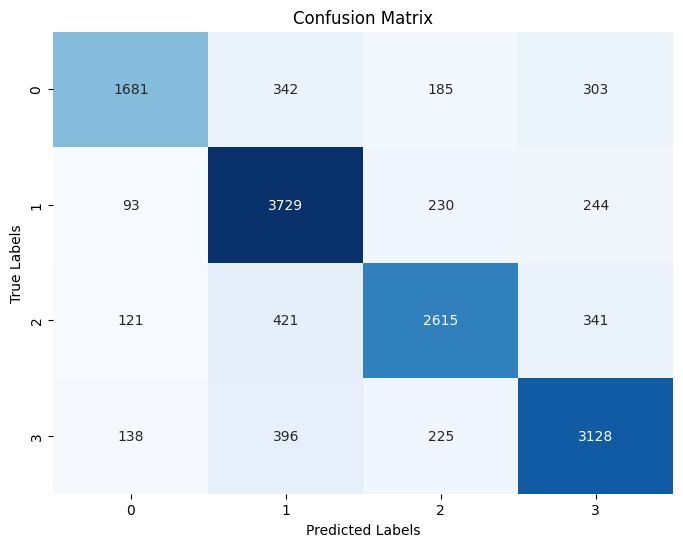

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.83      0.67      0.74      2511
    Negative       0.76      0.87      0.81      4296
     Neutral       0.80      0.75      0.77      3498
    Positive       0.78      0.80      0.79      3887

    accuracy                           0.79     14192
   macro avg       0.79      0.77      0.78     14192
weighted avg       0.79      0.79      0.78     14192



In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)

# Create a classification report
class_report = classification_report(y_test, predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)